## Houston - House Price Index vs Energy Industry
----

### Analysis
* This study shall focus on the correlation between fluctuations in oil and gas prices and the strength of the correlation with house prices in Houston.
* Houston is the oil and gas capital of the USA - and it would be interesting to investigate the impact of oil prices on the local economy with respect to the housing market.
* In addition to focussing on the city of Houston, other major cities in Texas, such as Dallas and Austin shall be used to confirm the strength of the impact emanating from the energy industry.
* A comparison of the labor market involved in the oil/gas sector by each of the cities is a good starting point on which to base the argument.

---

#### Note
* The FRED API shall be utilized for gathering the data.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import json

# Import API key
import config
from config import api_key

# Output File (CSV)
output_data_file = "output_data/quarter_data.csv"
output_data_file_2 = "output_data/annual_data.csv"

In [2]:
# The URL for the FRED API
base = 'https://api.stlouisfed.org/fred/series/observations?series_id='

# List of FRED series IDs and their description
q_dict = {'ATNHPIUS26420Q': 'House Price Index for Houston' ,
          'HOUS448UR':'Unemployment Rate in Houston', #Thousands of Persons (monthly)
           'SMU48264201000000001SA': 'Mining and Logging',
           'HOUS448MFG': 'Manufacturing',
           'HOUS448TRAD': 'Trade, Transportation, and Utilities',
           'HOUS448FIRE': 'Financial Activities',
           'HOUS448PBSV': 'Professional and Business Services',
           'HOUS448EDUH': 'Education and Health Services',          
           'HOUS448LEIH': 'Leisure and Hospitality',
           'HOUS448GOVT': 'Government',
           'SMU48264201021100001SA':'Oil and Gas Extraction',
           'SMU48264202000000001SA':'Construction in Houston',
           #Dollars (monthly)
           'WTISPLC': 'Global price of WTI Crude',
           #Percent (monthly)
           'MORTGAGE30US': '30Yr Fixed Mortgage Rate',
           #CPI (monthly)
           'CUURA318SA0':'CPI for Houston'
          }

# Include start date, API key from config.py file and file type json
start_date = '1990-01-01'
s_dates = '&observation_start={}'.format(start_date)
end_date = '2017-01-01'
e_dates = '&observation_end={}'.format(end_date)

api_key = '&api_key={}'.format(config.api_key)

ftype = '&file_type=json'
frequency = 'a'
freq = '&frequency={}'.format(frequency)
#aggregation = 'eop'
#agg = '&aggregation_method={}'.format(aggregation)

In [5]:
df = pd.DataFrame()
for code, name in q_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base, code, s_dates,e_dates, api_key, ftype,freq)
    r = requests.get(url).json()['observations']
    df[name] = [i['value'] for i in r]
df.index = pd.to_datetime([i['date'] for i in r])
df.head()
df.to_csv('output_data/general.csv')
df

,House Price Index for Houston,Unemployment Rate in Houston,Mining and Logging,Manufacturing,"Trade, Transportation, and Utilities",Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Government,Oil and Gas Extraction,Construction in Houston,Global price of WTI Crude,30Yr Fixed Mortgage Rate,CPI for Houston
1990-01-01,92.83,5.1,60.7,201.9,406.9,114.4,212.1,161.9,137.5,250.6,39.5,134.8,24.493,10.13,120.867
1991-01-01,95.88,5.7,64.3,207.4,404.0,112.8,226.3,166.5,139.3,259.0,41.3,132.1,21.481,9.25,125.300
1992-01-01,99.39,7.2,62.4,203.1,398.9,112.1,225.3,172.6,141.0,267.7,41.7,126.2,20.561,8.39,129.183
1993-01-01,101.30,7.4,61.0,203.0,407.1,112.3,232.2,179.6,146.4,275.5,38.8,124.2,18.458,7.31,133.750
1994-01-01,101.47,6.7,62.6,207.9,415.4,112.5,238.3,183.1,149.5,283.9,37.7,128.6,17.186,8.38,137.917
1995-01-01,101.64,5.9,60.3,216.7,429.3,111.6,252.4,187.9,155.2,291.8,36.8,135.8,18.428,7.93,139.967
1996-01-01,104.15,5.5,60.5,225.6,436.2,112.7,262.2,192.4,158.5,295.0,36.1,143.1,22.154,7.81,142.833
1997-01-01,106.61,5.2,63.6,235.2,448.0,117.8,283.8,202.6,165.1,300.1,35.9,145.9,20.599,7.60,145.467
1998-01-01,113.22,4.4,67.5,243.9,468.7,125.5,308.3,210.5,172.5,305.9,37.4,158.1,14.388,6.94,146.800
1999-01-01,121.62,4.8,62.1,231.7,481.2,130.9,313.5,216.6,178.6,310.9,37.3,165.9,19.252,7.44,148.933


In [146]:
# List of FRED series IDs and their description
a_dict = {
           'TXHARR1POP':'Population in Harris County',
           'TXFORT5POP':'Population in Fort Bend County',
           'TXMONT0POP':'Population in Montgomery County',
           'TXGALV7POP':'Population in Galveston County',
           'TXBRAZ0POP':'Population in Brazoria County',
           'TXLIBE1POP':'Population in Liberty County',
           'TXWALL3POP':'Population in Waller County',
           'TXCHAM1POP':'Population in Chambers County',
           'TXAUST5POP':'Population in Austin County'
           }

# Include start date, API key from config.py file and file type json
start_date = '1990-01-01'
s_dates = '&observation_start={}'.format(start_date)
end_date = '2017-01-01'
e_dates = '&observation_end={}'.format(end_date)
api_key = '&api_key={}'.format(config.api_key)
ftype = '&file_type=json'
frequency = 'a'
freq = '&frequency={}'.format(frequency)
#aggregation = 'eop'
#agg = '&aggregation_method={}'.format(aggregation)

In [147]:
dff = pd.DataFrame()
for code, name in a_dict.items():
    url = '{}{}{}{}{}{}{}'.format(base, code, s_dates,e_dates, api_key, ftype,freq)
    r = requests.get(url).json()['observations']
    dff[name] = [i['value'] for i in r]
dff.index = pd.to_datetime([i['date'] for i in r])
dff.to_csv('output_data/population.csv')
dff.head()
#len(dff)

,Population in Harris County,Population in Fort Bend County,Population in Montgomery County,Population in Galveston County,Population in Brazoria County,Population in Liberty County,Population in Waller County,Population in Chambers County,Population in Austin County
1990-01-01,2835.927,228.191,184.066,218.363,192.644,52.887,23.507,20.144,19.891
1991-01-01,2912.041,240.604,192.732,222.854,198.707,53.848,23.474,20.442,20.183
1992-01-01,2982.258,253.352,202.374,227.406,203.275,55.051,24.655,20.756,20.643
1993-01-01,3033.757,264.940,211.878,232.199,208.005,56.645,25.718,21.263,21.159
1994-01-01,3080.698,275.507,221.428,234.557,212.209,58.925,26.716,21.901,21.414


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### House Price Index vs. Oil Price

In [148]:
x1_axis = df.index.values
x2_axis =dff.index.values

In [149]:
df.dtypes
cols = df.columns[df.dtypes.eq(object)]
cols
for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df.dtypes

House Price Index for Houston           float64
Unemployment Rate in Houston            float64
Mining and Logging                      float64
Manufacturing                           float64
Trade, Transportation, and Utilities    float64
Financial Activities                    float64
Professional and Business Services      float64
Education and Health Services           float64
Leisure and Hospitality                 float64
Government                              float64
Oil and Gas Extraction                  float64
Construction in Houston                 float64
Global price of WTI Crude               float64
30Yr Fixed Mortgage Rate                float64
CPI for Houston                         float64
dtype: object

In [150]:
dff.dtypes
cols = dff.columns[dff.dtypes.eq(object)]
cols
for d in cols:
    dff[d] = pd.to_numeric(dff[d], errors='coerce')
dff.dtypes

Population in Harris County        float64
Population in Fort Bend County     float64
Population in Montgomery County    float64
Population in Galveston County     float64
Population in Brazoria County      float64
Population in Liberty County       float64
Population in Waller County        float64
Population in Chambers County      float64
Population in Austin County        float64
dtype: object

In [151]:
df.to_csv(output_data_file)
dff.to_csv(output_data_file_2)

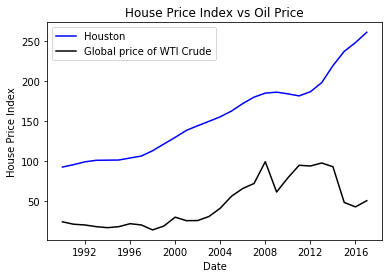

In [152]:
x1_axis = df.index.values

#plt.plot(x_axis, y_axis)
plt.plot(x1_axis, df["House Price Index for Houston"],color="blue", label="Houston" )
plt.plot(x1_axis, df["Global price of WTI Crude"],color='black')

plt.legend(loc="best")

plt.title(f"House Price Index vs Oil Price")
plt.ylabel("House Price Index")
plt.xlabel("Date")

#plt.savefig("Latitude_v_MaxTemp.png")
plt.savefig("output_plot/House price Index vs WTI Oil Price.png")
plt.show()

In [153]:
df['MA'] = df.rolling(window=3)["Global price of WTI Crude"].mean()
df.head()

,House Price Index for Houston,Unemployment Rate in Houston,Mining and Logging,Manufacturing,"Trade, Transportation, and Utilities",Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Government,Oil and Gas Extraction,Construction in Houston,Global price of WTI Crude,30Yr Fixed Mortgage Rate,CPI for Houston,MA
1990-01-01,92.83,5.1,60.7,201.9,406.9,114.4,212.1,161.9,137.5,250.6,39.5,134.8,24.493,10.13,120.867,NaN
1991-01-01,95.88,5.7,64.3,207.4,404.0,112.8,226.3,166.5,139.3,259.0,41.3,132.1,21.481,9.25,125.300,NaN
1992-01-01,99.39,7.2,62.4,203.1,398.9,112.1,225.3,172.6,141.0,267.7,41.7,126.2,20.561,8.39,129.183,22.178333
1993-01-01,101.30,7.4,61.0,203.0,407.1,112.3,232.2,179.6,146.4,275.5,38.8,124.2,18.458,7.31,133.750,20.166667
1994-01-01,101.47,6.7,62.6,207.9,415.4,112.5,238.3,183.1,149.5,283.9,37.7,128.6,17.186,8.38,137.917,18.735000


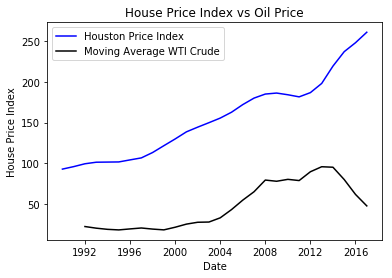

In [154]:
plt.plot(x1_axis, df["House Price Index for Houston"],color="blue", label="Houston Price Index" )
plt.plot(x1_axis, df["MA"],color='black',label = "Moving Average WTI Crude")

plt.legend(loc="best")

plt.title(f"House Price Index vs Oil Price")
plt.ylabel("House Price Index")
plt.xlabel("Date")

plt.savefig("output_plot/House price Index vs MA WTA Oil Price.png")
plt.show()


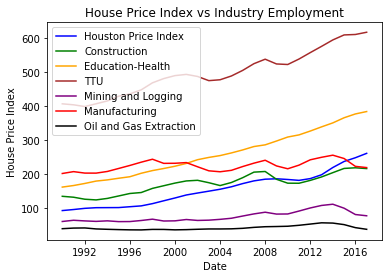

In [155]:
plt.plot(x1_axis, df["House Price Index for Houston"],color="blue", label="Houston Price Index" )
plt.plot(x1_axis, df["Construction in Houston"],color="green", label="Construction" )
plt.plot(x1_axis, df["Education and Health Services"],color="orange", label="Education-Health" )
plt.plot(x1_axis, df["Trade, Transportation, and Utilities"],color="brown", label="TTU" )
plt.plot(x1_axis, df["Mining and Logging"],color="purple", label="Mining and Logging" )
plt.plot(x1_axis, df["Manufacturing"],color="red", label="Manufacturing" )
plt.plot(x1_axis, df["Oil and Gas Extraction"],color="black", label="Oil and Gas Extraction" )

plt.legend(loc="best")

plt.title(f"House Price Index vs Industry Employment")
plt.ylabel("House Price Index")
plt.xlabel("Date")

plt.savefig("output_plot/House Price Index vs Industry Employment")
plt.show()

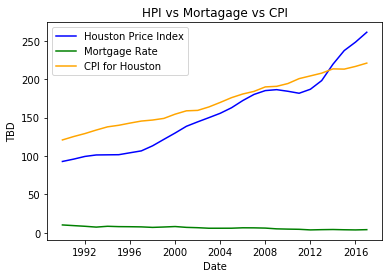

In [156]:
plt.plot(x1_axis, df["House Price Index for Houston"],color="blue", label="Houston Price Index" )
plt.plot(x1_axis, df["30Yr Fixed Mortgage Rate"],color="green", label="Mortgage Rate" )
plt.plot(x1_axis, df["CPI for Houston"],color="orange", label="CPI for Houston" )

plt.legend(loc="best")

plt.title(f"HPI vs Mortagage vs CPI")
plt.ylabel("TBD")
plt.xlabel("Date")

plt.savefig("output_plot/HPI vs Mortagage vs CPI")
plt.show()

In [157]:
dff.head()

,Population in Harris County,Population in Fort Bend County,Population in Montgomery County,Population in Galveston County,Population in Brazoria County,Population in Liberty County,Population in Waller County,Population in Chambers County,Population in Austin County
1990-01-01,2835.927,228.191,184.066,218.363,192.644,52.887,23.507,20.144,19.891
1991-01-01,2912.041,240.604,192.732,222.854,198.707,53.848,23.474,20.442,20.183
1992-01-01,2982.258,253.352,202.374,227.406,203.275,55.051,24.655,20.756,20.643
1993-01-01,3033.757,264.940,211.878,232.199,208.005,56.645,25.718,21.263,21.159
1994-01-01,3080.698,275.507,221.428,234.557,212.209,58.925,26.716,21.901,21.414


In [158]:
dff.columns
dff['Houston_Population']=dff['Population in Harris County']\
                        +dff['Population in Fort Bend County']\
                        +dff['Population in Montgomery County']\
+dff['Population in Galveston County']\
+dff['Population in Brazoria County']\
+dff['Population in Liberty County']\
+dff['Population in Waller County']\
+dff['Population in Chambers County']\
+dff['Population in Austin County']


dff = dff.diff()

dff

,Population in Harris County,Population in Fort Bend County,Population in Montgomery County,Population in Galveston County,Population in Brazoria County,Population in Liberty County,Population in Waller County,Population in Chambers County,Population in Austin County,Houston_Population
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-01,76.114,12.413,8.666,4.491,6.063,0.961,-0.033,0.298,0.292,109.265
1992-01-01,70.217,12.748,9.642,4.552,4.568,1.203,1.181,0.314,0.460,104.885
1993-01-01,51.499,11.588,9.504,4.793,4.730,1.594,1.063,0.507,0.516,85.794
1994-01-01,46.941,10.567,9.550,2.358,4.204,2.280,0.998,0.638,0.255,77.791
1995-01-01,40.923,10.802,10.388,2.775,3.562,3.614,0.875,0.872,0.408,74.219
1996-01-01,51.338,13.554,11.405,2.794,4.503,1.254,1.109,0.773,0.285,87.015
1997-01-01,56.379,12.684,12.336,2.586,5.107,1.734,0.750,0.812,0.233,92.621
1998-01-01,65.712,15.443,13.486,2.932,5.824,1.045,1.150,0.728,0.383,106.703
1999-01-01,64.621,15.382,15.228,3.249,6.397,2.089,1.143,0.429,0.406,108.944


In [163]:
dff = dff.dropna()
dff['']
dff.head()

,Population in Harris County,Population in Fort Bend County,Population in Montgomery County,Population in Galveston County,Population in Brazoria County,Population in Liberty County,Population in Waller County,Population in Chambers County,Population in Austin County,Houston_Population
1991-01-01,76.114,12.413,8.666,4.491,6.063,0.961,-0.033,0.298,0.292,109.265
1992-01-01,70.217,12.748,9.642,4.552,4.568,1.203,1.181,0.314,0.460,104.885
1993-01-01,51.499,11.588,9.504,4.793,4.730,1.594,1.063,0.507,0.516,85.794
1994-01-01,46.941,10.567,9.550,2.358,4.204,2.280,0.998,0.638,0.255,77.791
1995-01-01,40.923,10.802,10.388,2.775,3.562,3.614,0.875,0.872,0.408,74.219


In [165]:
dff.to_csv('output_data/Houston_clean_data.csv')

,House Price Index for Houston,Unemployment Rate in Houston,Mining and Logging,Manufacturing,"Trade, Transportation, and Utilities",Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Government,Oil and Gas Extraction,Construction in Houston,Global price of WTI Crude,30Yr Fixed Mortgage Rate,CPI for Houston,MA,Houston_Population
1990-01-01,92.83,5.1,60.7,201.9,406.9,114.4,212.1,161.9,137.5,250.6,39.5,134.8,24.493,10.13,120.867,NaN,NaN
1991-01-01,95.88,5.7,64.3,207.4,404.0,112.8,226.3,166.5,139.3,259.0,41.3,132.1,21.481,9.25,125.300,NaN,109.265
1992-01-01,99.39,7.2,62.4,203.1,398.9,112.1,225.3,172.6,141.0,267.7,41.7,126.2,20.561,8.39,129.183,22.178333,104.885
1993-01-01,101.30,7.4,61.0,203.0,407.1,112.3,232.2,179.6,146.4,275.5,38.8,124.2,18.458,7.31,133.750,20.166667,85.794
1994-01-01,101.47,6.7,62.6,207.9,415.4,112.5,238.3,183.1,149.5,283.9,37.7,128.6,17.186,8.38,137.917,18.735000,77.791


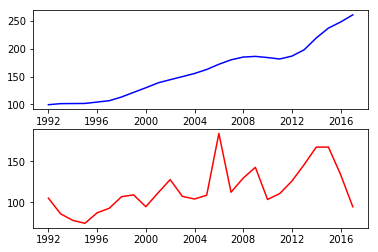

In [105]:
x_axis =df.index.values

plt.figure(1)
plt.subplot(212)
plt.plot(x_axis, df["Houston_Population"],color="red")


plt.subplot(211)
plt.plot(x_axis, df["House Price Index for Houston"],color="blue")

ax = plt.gca()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (28,) and (26,)

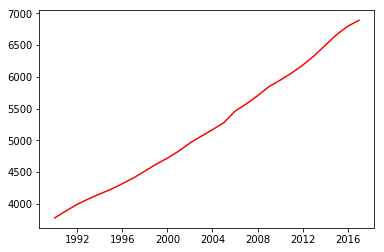

In [124]:
x2_axis =dff.index.values
plt.plot(x2_axis, dff["Houston_Population"],color="red", label="Houston Population" )
plt.plot(x1_axis, df["House Price Index for Houston"].values*20,color="blue", label="Houston Price Index" )
plt.legend(loc="best")

plt.title(f"Houston Population")
plt.ylabel("Thousands")
plt.xlabel("Year")

plt.savefig("Houston Population")
plt.show()

In [106]:
df["House Price Index for Houston"].values*20

array([ 1987.8,  2026. ,  2029.4,  2032.8,  2083. ,  2132.2,  2264.4,
        2432.4,  2597.8,  2773.2,  2888.6,  2998.6,  3111.6,  3255.8,
        3443.4,  3603.4,  3702.8,  3727.4,  3685.6,  3633.8,  3738. ,
        3963.8,  4390.2,  4745.8,  4965.6,  5223.4])

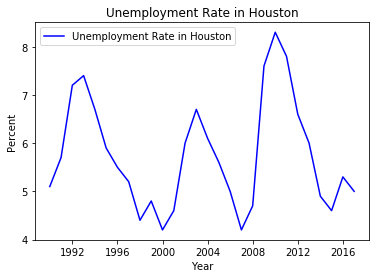

In [59]:
plt.plot(x1_axis, df["Unemployment Rate in Houston"],color="blue", label="Unemployment Rate in Houston" )

plt.legend(loc="best")

plt.title(f"Unemployment Rate in Houston")
plt.ylabel("Percent")
plt.xlabel("Year")

plt.savefig("output_data/Unemployment Rate in Houston")
plt.show()

In [46]:
df = df.dropna()
df

,House Price Index for Houston,Unemployment Rate in Houston,Mining and Logging,Manufacturing,"Trade, Transportation, and Utilities",Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Government,Oil and Gas Extraction,Construction in Houston,Global price of WTI Crude,30Yr Fixed Mortgage Rate,CPI for Houston,MA,Houston_Population
1992-01-01,99.39,7.2,62.4,203.1,398.9,112.1,225.3,172.6,141.0,267.7,41.7,126.2,20.561,8.39,129.183,22.178333,104.885
1993-01-01,101.30,7.4,61.0,203.0,407.1,112.3,232.2,179.6,146.4,275.5,38.8,124.2,18.458,7.31,133.750,20.166667,85.794
1994-01-01,101.47,6.7,62.6,207.9,415.4,112.5,238.3,183.1,149.5,283.9,37.7,128.6,17.186,8.38,137.917,18.735000,77.791
1995-01-01,101.64,5.9,60.3,216.7,429.3,111.6,252.4,187.9,155.2,291.8,36.8,135.8,18.428,7.93,139.967,18.024000,74.219
1996-01-01,104.15,5.5,60.5,225.6,436.2,112.7,262.2,192.4,158.5,295.0,36.1,143.1,22.154,7.81,142.833,19.256000,87.015
1997-01-01,106.61,5.2,63.6,235.2,448.0,117.8,283.8,202.6,165.1,300.1,35.9,145.9,20.599,7.60,145.467,20.393667,92.621
1998-01-01,113.22,4.4,67.5,243.9,468.7,125.5,308.3,210.5,172.5,305.9,37.4,158.1,14.388,6.94,146.800,19.047000,106.703
1999-01-01,121.62,4.8,62.1,231.7,481.2,130.9,313.5,216.6,178.6,310.9,37.3,165.9,19.252,7.44,148.933,18.079667,108.944
2000-01-01,129.89,4.2,62.6,232.0,489.9,133.7,324.5,223.3,184.1,315.8,36.1,173.7,30.298,8.05,154.450,21.312667,94.486
2001-01-01,138.66,4.6,66.5,234.0,493.5,135.1,327.8,231.5,188.6,320.7,36.7,180.0,25.924,6.97,158.800,25.158000,111.343


In [47]:
df.columns.values

array(['House Price Index for Houston', 'Unemployment Rate in Houston',
       'Mining and Logging', 'Manufacturing',
       'Trade, Transportation, and Utilities', 'Financial Activities',
       'Professional and Business Services',
       'Education and Health Services', 'Leisure and Hospitality',
       'Government', 'Oil and Gas Extraction', 'Construction in Houston',
       'Global price of WTI Crude', '30Yr Fixed Mortgage Rate',
       'CPI for Houston', 'MA', 'Houston_Population'], dtype=object)

In [85]:
log_dat = df.apply(np.log)
log_df.head(2)

,House Price Index for Houston,Unemployment Rate in Houston,Mining and Logging,Manufacturing,"Trade, Transportation, and Utilities",Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Government,Oil and Gas Extraction,Construction in Houston,Global price of WTI Crude,30Yr Fixed Mortgage Rate,CPI for Houston,MA,Houston_Population
1992-01-01,4.599052,1.974081,4.133565,5.313698,5.988711,4.719391,5.417433,5.150977,4.948760,5.589867,3.730501,4.837868,3.023396,2.127041,4.861230,3.099116,4.652865
1993-01-01,4.618086,2.001480,4.110874,5.313206,6.009059,4.721174,5.447599,5.190732,4.986343,5.618588,3.658420,4.821893,2.915498,1.989243,4.895972,3.004031,4.451949


In [72]:
import statsmodels.formula.api as sm
new_df = pd.DataFrame({"A": df['House Price Index for Houston'],
                   "B": df['Manufacturing'], 
                   "C": df['Mining and Logging'], 
                   "D":df['Leisure and Hospitality'], 
                   "E":df['Construction in Houston']})

new_df = new_df.reset_index(drop=True)
new_df

,A,B,C,D,E
0,99.39,203.1,62.4,141.0,126.2
1,101.30,203.0,61.0,146.4,124.2
2,101.47,207.9,62.6,149.5,128.6
3,101.64,216.7,60.3,155.2,135.8
4,104.15,225.6,60.5,158.5,143.1
5,106.61,235.2,63.6,165.1,145.9
6,113.22,243.9,67.5,172.5,158.1
7,121.62,231.7,62.1,178.6,165.9
8,129.89,232.0,62.6,184.1,173.7
9,138.66,234.0,66.5,188.6,180.0


In [71]:
result = sm.ols(formula="A ~ B + C + D + E", data=new_df).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1453.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           2.52e-25
Time:                        19:10:25   Log-Likelihood:                -63.975
No. Observations:                  26   AIC:                             137.9
Df Residuals:                      21   BIC:                             144.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.1271     11.035      3.274      0.0

In [63]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(new_df[['B', 'C', 'D','E']], new_df['A'])
reg.coef_

array([-0.52241   ,  0.21020162,  0.74176662,  0.38503229])

In [64]:
import statsmodels.formula.api as sm
from pandas.stats.api import ols

ModuleNotFoundError: No module named 'pandas.stats'

In [65]:
df1 = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
df1

,A,B,C
0,10,20,32
1,20,30,234
2,30,10,23
3,40,40,23
4,50,50,42523


In [69]:
result = sm.ols(formula="A ~ B + C", data=df1).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     1.375
Date:                Wed, 16 Jan 2019   Prob (F-statistic):              0.421
Time:                        19:08:54   Log-Likelihood:                -18.178
No. Observations:                   5   AIC:                             42.36
Df Residuals:                       2   BIC:                             41.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.9525     17.764      0.842      0.4

/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [88]:
t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)

In [129]:
new_df = df.apply(np.log)
new_df.head()

,House Price Index for Houston,Unemployment Rate in Houston,Mining and Logging,Manufacturing,"Trade, Transportation, and Utilities",Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Government,Oil and Gas Extraction,Construction in Houston,Global price of WTI Crude,30Yr Fixed Mortgage Rate,CPI for Houston,MA,Houston_Population
1992-01-01,4.599052,1.974081,4.133565,5.313698,5.988711,4.719391,5.417433,5.150977,4.948760,5.589867,3.730501,4.837868,3.023396,2.127041,4.861230,3.099116,4.652865
1993-01-01,4.618086,2.001480,4.110874,5.313206,6.009059,4.721174,5.447599,5.190732,4.986343,5.618588,3.658420,4.821893,2.915498,1.989243,4.895972,3.004031,4.451949
1994-01-01,4.619763,1.902108,4.136765,5.337057,6.029242,4.722953,5.473530,5.210032,5.007296,5.648622,3.629660,4.856707,2.844095,2.125848,4.926652,2.930393,4.354026
1995-01-01,4.621437,1.774952,4.099332,5.378514,6.062156,4.714921,5.531015,5.235910,5.044715,5.676069,3.605498,4.911183,2.913871,2.070653,4.941407,2.891704,4.307020
1996-01-01,4.645832,1.704748,4.102643,5.418764,6.078101,4.724729,5.569108,5.259577,5.065755,5.686975,3.586293,4.963544,3.098018,2.055405,4.961676,2.957823,4.466081


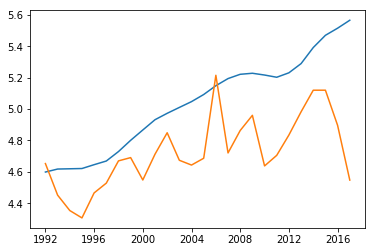

In [127]:
x = new_df.index.values
x
plt.plot(x,new_df['House Price Index for Houston'])
plt.plot(x,new_df['Houston_Population'])
plt.show()

In [125]:
new_df

,House Price Index for Houston,Unemployment Rate in Houston,Mining and Logging,Manufacturing,"Trade, Transportation, and Utilities",Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Government,Oil and Gas Extraction,Construction in Houston,Global price of WTI Crude,30Yr Fixed Mortgage Rate,CPI for Houston,MA,Houston_Population
1992-01-01,4.599052,1.974081,4.133565,5.313698,5.988711,4.719391,5.417433,5.150977,4.948760,5.589867,3.730501,4.837868,3.023396,2.127041,4.861230,3.099116,4.652865
1993-01-01,4.618086,2.001480,4.110874,5.313206,6.009059,4.721174,5.447599,5.190732,4.986343,5.618588,3.658420,4.821893,2.915498,1.989243,4.895972,3.004031,4.451949
1994-01-01,4.619763,1.902108,4.136765,5.337057,6.029242,4.722953,5.473530,5.210032,5.007296,5.648622,3.629660,4.856707,2.844095,2.125848,4.926652,2.930393,4.354026
1995-01-01,4.621437,1.774952,4.099332,5.378514,6.062156,4.714921,5.531015,5.235910,5.044715,5.676069,3.605498,4.911183,2.913871,2.070653,4.941407,2.891704,4.307020
1996-01-01,4.645832,1.704748,4.102643,5.418764,6.078101,4.724729,5.569108,5.259577,5.065755,5.686975,3.586293,4.963544,3.098018,2.055405,4.961676,2.957823,4.466081
1997-01-01,4.669177,1.648659,4.152613,5.460436,6.104793,4.768988,5.648270,5.311234,5.106551,5.704116,3.580737,4.982921,3.025243,2.028148,4.979949,3.015224,4.528516
1998-01-01,4.729333,1.481605,4.212128,5.496758,6.149963,4.832306,5.731073,5.349486,5.150397,5.723258,3.621671,5.063228,2.666395,1.937302,4.989071,2.946910,4.670049
1999-01-01,4.800901,1.568616,4.128746,5.445443,6.176283,4.874434,5.747799,5.378052,5.185149,5.739471,3.618993,5.111385,2.957615,2.006871,5.003497,2.894788,4.690834
2000-01-01,4.866688,1.435085,4.136765,5.446737,6.194201,4.895598,5.782286,5.408516,5.215479,5.755109,3.586293,5.157330,3.411082,2.085672,5.039870,3.059302,4.548452
2001-01-01,4.932025,1.526056,4.197202,5.455321,6.201523,4.906015,5.792404,5.444580,5.239628,5.770506,3.602777,5.192957,3.255169,1.941615,5.067646,3.225176,4.712616
